In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pprint
%matplotlib inline

In [3]:
url = "https://raw.githubusercontent.com/taimoon/data-wrangling-school-project/main/Austin%20Bicycle%20Crashes%202010-2017%20revised%20subset.csv"
df=pd.read_csv(url)
df.head()

,Crash ID,$1000 Damage to Any One Person's Property,Active School Zone Flag,Agency,At Intersection Flag,Construction Zone Flag,Construction Zone Workers Present Flag,Crash Death Count,Crash Incapacitating Injury Count,Crash Non-incapacitating Injury Count,...,Roadway Relation,Speed Limit,Street Name,Street Number,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,MercatorX,MercatorY
0,11243623,False,False,Austin Police Department,False,False,No,0,1,0,...,On Roadway,45,FM0969,4716,Dry,Marked Lanes,Clear,"Worn, Damaged",-1.087375e+07,3.540377e+06
1,12112069,False,False,Austin Police Department,False,False,No,0,0,2,...,On Roadway,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,-1.088093e+07,3.536402e+06
2,12112069,False,False,Austin Police Department,False,False,No,0,0,2,...,On Roadway,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,-1.088093e+07,3.536402e+06
3,12112069,False,False,Austin Police Department,False,False,No,0,0,2,...,On Roadway,35,E RIVERSIDE DR,200,Dry,Center Stripe/Divider,Clear,Not Worn,-1.088093e+07,3.536402e+06
4,11376123,False,False,Austin Police Department,False,False,No,0,0,1,...,On Roadway,45,SL0111,1487,Dry,None,Clear,Not Worn,-1.087615e+07,3.539540e+06


In [4]:
#create a list  for column indexing
outlier_col=["Crash Death Count","Crash Incapacitating Injury Count","Crash Non-incapacitating Injury Count",
             "Crash Not Injured Count","Crash Possible Injury Count","Crash Total Injury Count",
             "Crash Unknown Injury Count","Speed Limit" ]
print(len(outlier_col))

8


In [5]:
#create a dict to store location of outlier
out_dict = {}
new_key=0
for b in outlier_col:
    z = np.abs(stats.zscore(df[b]))
    out_index= np.where(z>3)
    
    # add into dictionary
    new_key+=1
    out_dict[b] = out_index


pprint.pprint(out_dict)

{'Crash Death Count': (array([ 103,  110,  331,  400,  599,  803,  844, 1032, 1279, 1411, 1649,
       1678, 1733, 1752, 1891], dtype=int64),),
 'Crash Incapacitating Injury Count': (array([560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572,
       573, 574, 575], dtype=int64),),
 'Crash Non-incapacitating Injury Count': (array([ 136,  137,  138,  711,  712,  713,  714,  884,  885,  886,  887,
       1583, 1584, 1585], dtype=int64),),
 'Crash Not Injured Count': (array([ 160,  403,  418,  419,  420,  421,  469,  642,  652,  663,  673,
        686,  729,  827,  828,  829, 1056, 1187, 1195, 1214, 1215, 1226,
       1231, 1580, 1581, 1582, 1611, 1629, 1741, 1895], dtype=int64),),
 'Crash Possible Injury Count': (array([ 222,  223,  224,  283,  393,  514,  663,  937, 1094, 1104, 1114,
       1115, 1227, 1275, 1310, 1311, 1354, 1355, 1580, 1581, 1582, 1686,
       1687, 1688, 1710, 1822], dtype=int64),),
 'Crash Total Injury Count': (array([560, 561, 562, 563, 564, 565, 566, 56

In [6]:
#to extract outlier value

for b in outlier_col:
    print("Outlier value for " + b)
    print(df[b].iloc[out_dict[b]])
    print(" ")
    print("-------------------------------------------------------------- ")

Outlier value for Crash Death Count
103     1
110     1
331     1
400     1
599     1
803     1
844     1
1032    1
1279    1
1411    1
1649    1
1678    1
1733    1
1752    1
1891    1
Name: Crash Death Count, dtype: int64
 
-------------------------------------------------------------- 
Outlier value for Crash Incapacitating Injury Count
560    14
561    14
562    14
563    14
564    14
565    14
566    14
567    14
568    14
569    14
570    14
571    14
572    14
573    14
574    14
575    14
Name: Crash Incapacitating Injury Count, dtype: int64
 
-------------------------------------------------------------- 
Outlier value for Crash Non-incapacitating Injury Count
136     3
137     3
138     3
711     4
712     4
713     4
714     4
884     3
885     3
886     3
887     3
1583    3
1584    3
1585    3
Name: Crash Non-incapacitating Injury Count, dtype: int64
 
-------------------------------------------------------------- 
Outlier value for Crash Not Injured Count
160     5
403   

In [7]:
#In the latest version of Pandas there is an easy way to do exactly this. 
#Column names (which are strings) can be sliced in whatever manner you like
df_measures= pd.DataFrame(df, columns=outlier_col)

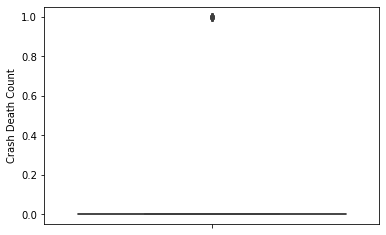

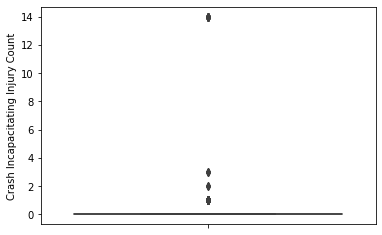

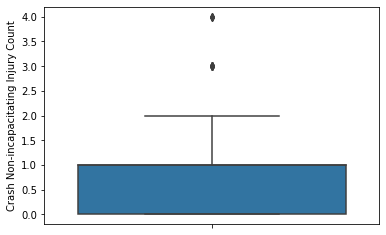

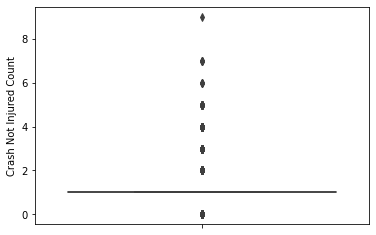

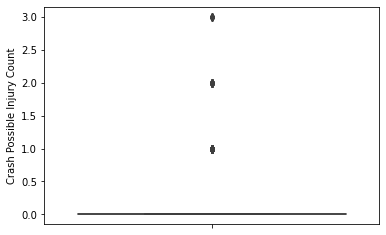

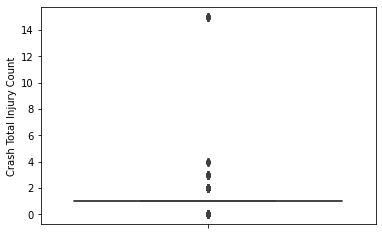

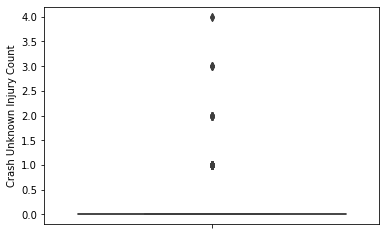

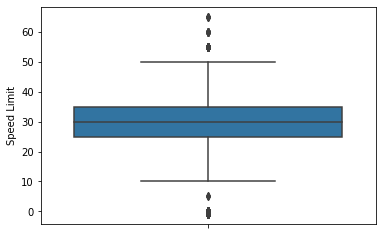

<Figure size 432x288 with 0 Axes>

In [8]:
#Box Plot
for col in outlier_col:
    sns.boxplot( y=df[col] )
    plt.figure()   # plots figure for each iteration

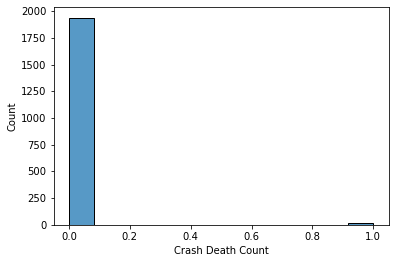

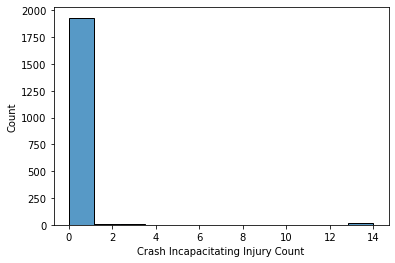

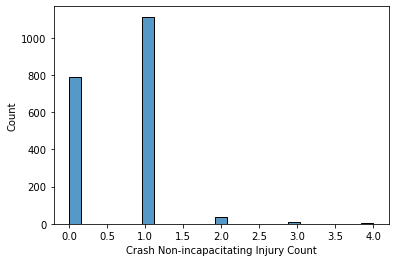

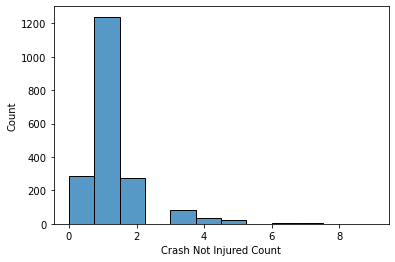

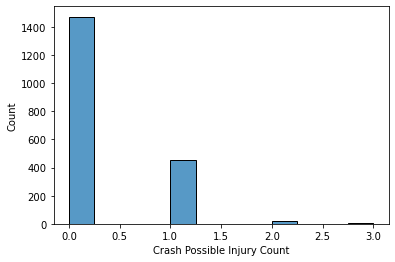

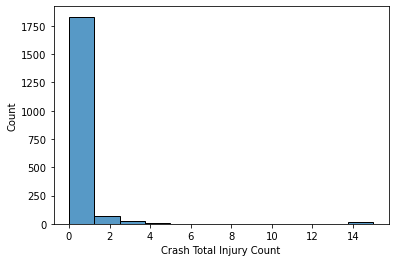

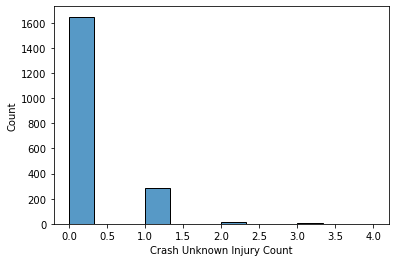

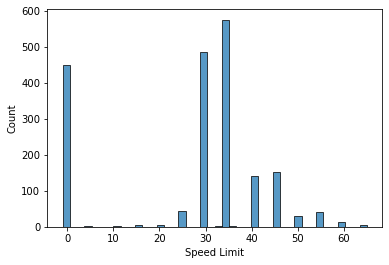

<Figure size 432x288 with 0 Axes>

In [9]:
#Histogram
for col in outlier_col:
    sns.histplot(data=df[col])
    plt.figure()   # plots figure for each iteration

No handles with labels found to put in legend.


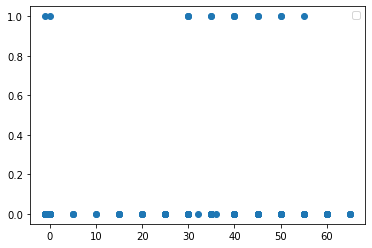

No handles with labels found to put in legend.


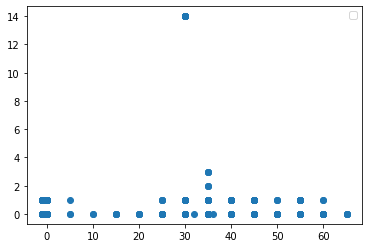

No handles with labels found to put in legend.


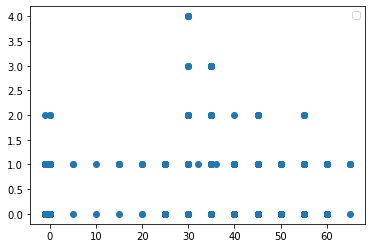

No handles with labels found to put in legend.


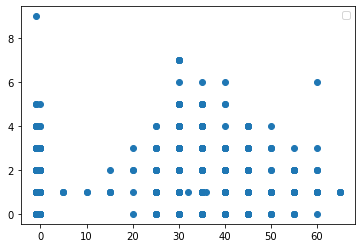

No handles with labels found to put in legend.


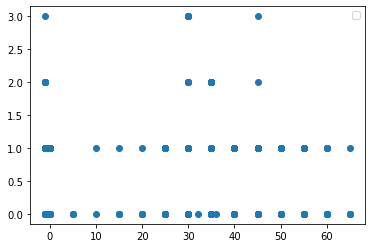

No handles with labels found to put in legend.


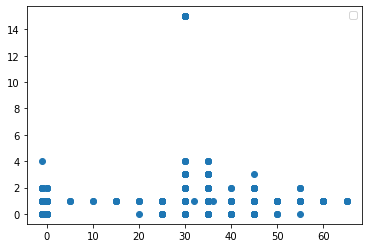

No handles with labels found to put in legend.


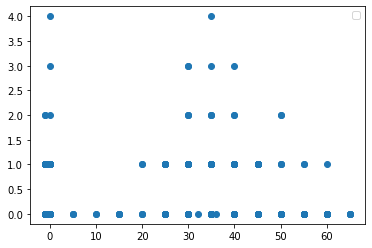

In [24]:
x_col = "Speed Limit"
y_columns = ["Crash Death Count","Crash Incapacitating Injury Count","Crash Non-incapacitating Injury Count",
             "Crash Not Injured Count","Crash Possible Injury Count","Crash Total Injury Count",
             "Crash Unknown Injury Count"]

outlier_col=["Crash Death Count","Crash Incapacitating Injury Count","Crash Non-incapacitating Injury Count",
             "Crash Not Injured Count","Crash Possible Injury Count","Crash Total Injury Count",
             "Crash Unknown Injury Count","Speed Limit" ]
for y_col in y_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df[x_col], df[y_col])
    #ax.set_xlabel(x_col)
    #ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))

    plt.legend()
    plt.show()